In [1]:

#A - 1

import pandas as pd
from sklearn import metrics

X = pd.read_csv('bbcsport_mtx.csv', delimiter=',', header=None).values
trueLabels = pd.read_csv('bbcsport_classes.csv', delimiter=',', header=None).values
terms = pd.read_csv('bbcsport_terms.csv', delimiter=',', header=None).values

print(trueLabels.shape) 
print(X.shape)
print(terms.shape)


(737, 1)
(737, 4613)
(4613, 1)


In [2]:

#A - 2

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score as mutual
from sklearn.metrics.cluster import adjusted_rand_score as rand
import numpy as np

mutualInfo=[]
randIndex=[]
cent=[]
i=0

while (i<50):
    kmeans = KMeans(n_clusters=5, init = "random")
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels    = kmeans.labels_
    mutualInfo.append(mutual(trueLabels[:,0], labels))
    randIndex.append(rand(trueLabels[:,0], labels))
    cent.append(centroids)
    i+=1
    
print("Mutual Information - ",np.mean(mutualInfo))
print("Rand Index - ",np.mean(randIndex))


Mutual Information -  0.17900913522334683
Rand Index -  0.09205528858752848


In [4]:

#A - 3

from sklearn import preprocessing

XNorm = preprocessing.normalize(X)
mutualInfo = []
randIndex = []
i=0

while (i<50):
    kmeans = KMeans(n_clusters=5, init = "random")
    kmeans.fit(XNorm)
    centroids = kmeans.cluster_centers_
    labels    = kmeans.labels_
    mutualInfo.append(mutual(trueLabels[:,0], labels))
    randIndex.append(rand(trueLabels[:,0], labels))
    cent.append(centroids)
    i+=1
    
print("Mutual Information - ",np.mean(mutualInfo))
print("Rand Index - ",np.mean(randIndex))


Mutual Information -  0.7913279716597748
Rand Index -  0.7864981057114888


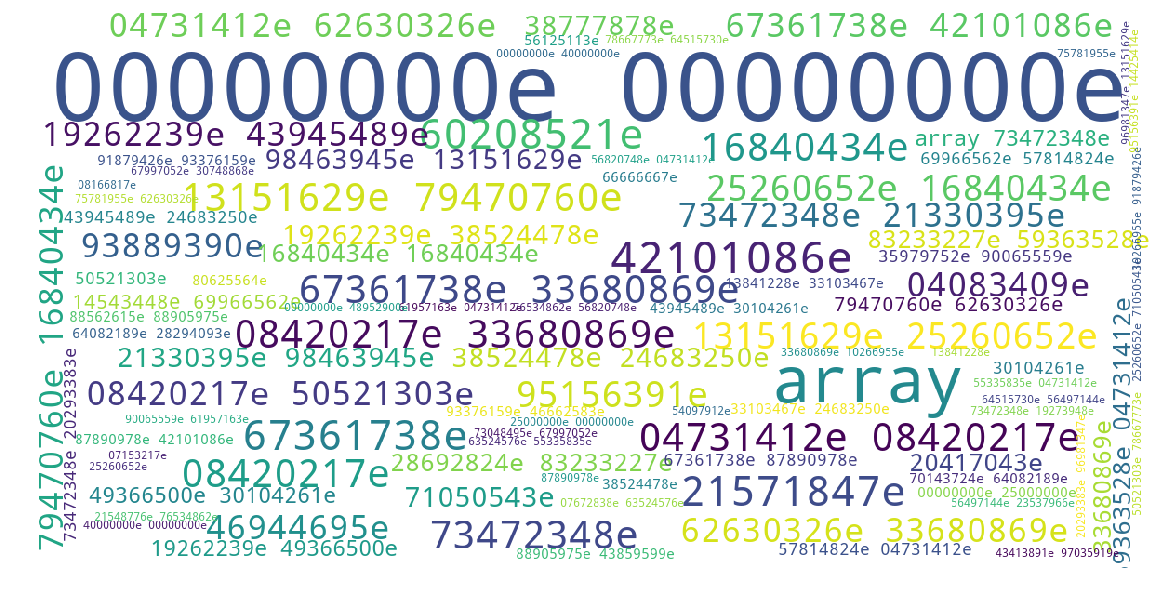

In [6]:

#A - 4

from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt

def Mywordcloud(data):
    stopwords= set(STOPWORDS)
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,
                         max_font_size=40,scale=3,random_state=1).generate(str(data))
    fig = plt.figure(1,figsize=(20,20))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
Mywordcloud(cent)

In [21]:

#B

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

XNorm = scale(X)

#95% variance
pca = PCA(n_components=558)
pca.fit(XNorm)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
print(len(var1))

#98% variance
pca = PCA(n_components=626)
pca.fit(XNorm)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
print(len(var1))


C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[ 1.51  2.8   3.96  4.97  5.93  6.8   7.65  8.47  9.24  9.97 10.69 11.34
 11.98 12.61 13.23 13.8  14.36 14.91 15.46 16.   16.52 17.01 17.49 17.96
 18.42 18.87 19.31 19.75 20.18 20.61 21.03 21.44 21.84 22.24 22.63 23.02
 23.41 23.79 24.17 24.55 24.92 25.28 25.64 26.   26.35 26.7  27.04 27.38
 27.72 28.06 28.4  28.73 29.06 29.39 29.72 30.04 30.36 30.68 30.99 31.3
 31.61 31.92 32.23 32.54 32.84 33.14 33.44 33.74 34.04 34.34 34.63 34.92
 35.21 35.5  35.79 36.07 36.35 36.63 36.91 37.19 37.47 37.74 38.01 38.28
 38.55 38.82 39.08 39.34 39.6  39.86 40.12 40.38 40.64 40.89 41.14 41.39
 41.64 41.89 42.14 42.39 42.63 42.87 43.11 43.35 43.59 43.83 44.07 44.31
 44.55 44.78 45.01 45.24 45.47 45.7  45.93 46.16 46.39 46.61 46.83 47.05
 47.27 47.49 47.71 47.93 48.15 48.36 48.57 48.78 48.99 49.2  49.41 49.62
 49.83 50.04 50.25 50.46 50.67 50.88 51.08 51.28 51.48 51.68 51.88 52.08
 52.28 52.48 52.68 52.87 53.06 53.25 53.44 53.63 53.82 54.01 54.2  54.39
 54.58 54.77 54.96 55.15 55.34 55.52 55.7  55.88 56.